### Use differential expressed (DE) miRNA/mRNA to get cohort-specific and disease relatated ceRNA axis from GDM data

Background of GDM data:

```text
With applications to gestational diabetes mellitus (GDM), we predicted nine risk protein-coding biomarkers and some potential lncRNA–miRNA–mRNA regulatory axes, which all correlated with GDM. In those regulatory axes, the MALAT1/hsa-miR-144-3p/IRS1 axis was predicted to be the key axis and was identified as being associated with GDM for the first time.
```

In [7]:
%load_ext autoreload

# Just download the github, and load the cernaxis into python path
# do
import sys
sys.path.append('../../')

# or install cernaxis by pip
#!pip install git+https://github.com/compbioclub/cernaxis.git@v1_as


from cernaxis.cernaxis import ceRNAxis

# initialize cernaxis object
cernaxis = ceRNAxis()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%autoreload

# Use DE miRNA/mRNA to get the ceRNA_axis

import pandas as pd

# use DE miRNA list as the strict criteria
miRNA_list = pd.read_csv('../../demo/GDM_DEG_miRNA_GSE112168.txt')['symbol'].to_list()
print(miRNA_list[:5])
mRNA_list = pd.read_csv('../../demo/GDM_DEG_mRNA_GSE154377.txt')['symbol'].to_list()
print(mRNA_list[:5])

['hsa-miR-125a-3p', 'hsa-miR-619-5p', 'hsa-miR-224-5p', 'hsa-miR-3180-1-3p', 'hsa-miR-3180-2-3p']
['PSAP', 'SNORD17', 'SNORD15B', 'RAB13', 'FLNA']


In [9]:
%autoreload
# Use strict DE miRNA to get the ceRNA_axis
ceRNA_df, axis_df = cernaxis.find_ceRNA_axis_by_DEG_list(miRNA_list, mRNA_list)
# store the filtered ceRNA network and ceRNA axis
ceRNA_df.to_csv('../../demo_out/GDM_ceRNA_network.csv')
axis_df.to_csv('../../demo_out/GDM_ceRNA_axis.csv')
axis_df

/Users/chenlingxi/Library/CloudStorage/Dropbox/workspace/SCZ/ceRNAxis/docs/tutorial/../../cernaxis/cernaxis.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,miRNA,ceRNA,species,database,type,inference
220575,hsa-miR-106b-5p,ABCD1,Homo sapiens,miRWalk,miRNA-mRNA,strict
220710,hsa-miR-106b-5p,ACKR2,Homo sapiens,miRWalk,miRNA-mRNA,strict
220727,hsa-miR-106b-5p,ACVR2B,Homo sapiens,RNAInter,miRNA-mRNA,strict
220732,hsa-miR-106b-5p,ADAM22,Homo sapiens,miRWalk,miRNA-mRNA,strict
220735,hsa-miR-106b-5p,ADAMTS1,Homo sapiens,RNAInter,miRNA-mRNA,strict
...,...,...,...,...,...,...
2489318,hsa-miR-363-3p,ZC3HAV1L,Homo sapiens,RNAInter;miRTarBase_9.0,miRNA-mRNA,strict
2489351,hsa-miR-363-3p,ZNF142,Homo sapiens,RNAInter,miRNA-mRNA,strict
2489387,hsa-miR-363-3p,ZNF470,Homo sapiens,miRWalk,miRNA-mRNA,strict
2489393,hsa-miR-363-3p,ZNF521,Homo sapiens,miRDB_6.0;RNAInter,miRNA-mRNA,strict


Compared with DLRAPom detected ceRNA axes

Interactions detected by both tools: {'hsa-miR-144-3p|MALAT1', 'hsa-miR-224-5p|ATP11A', 'hsa-miR-363-3p|MALAT1', 'hsa-miR-106b-5p|XIST', 'hsa-miR-224-5p|MALAT1', 'hsa-miR-144-3p|IRS1', 'hsa-miR-363-3p|XIST', 'hsa-miR-106b-5p|ATP11A', 'hsa-miR-106b-5p|MALAT1'}


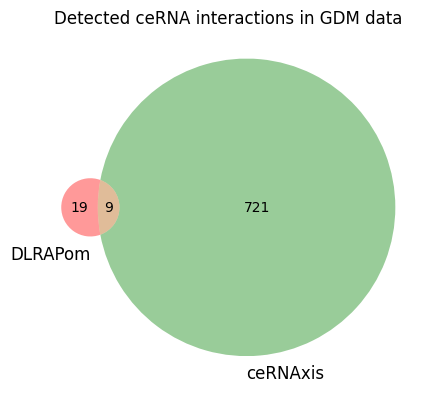

In [10]:

import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt

df = pd.read_csv('../../demo_out/GDM_DLRAPom_ceRNA_axis.csv')
df['Tool'] = 'DLRAPom'
df3 = axis_df[['miRNA', 'ceRNA', 'type']].drop_duplicates()
df3['Tool'] = 'ceRNAxis'
df = pd.concat([df, df3])
df

summary = (
    df
    .drop_duplicates(['miRNA','ceRNA','type','Tool'])
    .groupby('Tool')
    .size()
    .reset_index(name='# of interactions')
)

tools = summary['Tool'].tolist()
sets = {
    tool: set(df[df.Tool==tool].apply(lambda r: f"{r.miRNA}|{r.ceRNA}", axis=1))
    for tool in tools
}

print('Interactions detected by both tools:', sets['DLRAPom'] & sets['ceRNAxis'])

from matplotlib_venn import venn2
A, B = tools
fig = plt.figure(figsize=(5,5))
venn2([sets[A], sets[B]], set_labels=[A, B])


plt.title('Detected ceRNA interactions in GDM data')
plt.show()
fig.savefig('../../demo_out/GDM_venn.pdf', format='pdf')
